# Estrategia de inversión con base en medias moviles


Este programa automatiza la descarga de información sobre el precio de una determinada acción, nos apoya con la creación de un Data frame y medias moviles, estas ultimas nos ayudan a entender las tendencias de la acción, las usaremos para definir si el dia de hoy es buen momento para invertir en la acción de **AMAZON**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

### Busqueda de información y creación del Dataframe

In [49]:
# nombre del ticker en bolsa de la empresa
ticker='AMZN'

In [50]:
#Guardamos en un Data Frame la información de la acción con las fechas a buscar
accion=yf.download(ticker,
                  start='2019-01-01',
                  end='2025-09-12',
                  progress=False)

/tmp/ipython-input-1819499935.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  accion=yf.download(ticker,


In [51]:
#Cambiamos el nombre de las columnas
accion.columns=["Close","High","Low","Open","Volume"]

In [52]:
#Index
accion=accion[['Close']]

In [53]:
#Cambio nombre para identificar
accion=accion.rename(columns={'Close':'precio_cierre'})

### Creación de las medias moviles y señales de compra o venta


Tomaremos en cuenta que cuando el precio promedio de los ultimos 10 dias sea mayor al promedio de los ultimos 60 dias, sera una señal de compra caso opuesto sera una señal de venta


In [54]:
#promedio movil a 10 dias
accion['MA-10']=accion['precio_cierre'].rolling(window=10).mean()
#promedio movil a 60 dias(señal de largo plazo)
accion['MA-60']=accion['precio_cierre'].rolling(window=60).mean()

In [55]:
accion['invertir']=accion['MA-10']>accion['MA-60']

In [56]:
#señal
#crear una columna adicional que indique si debe comprar o no
accion['Señal']=0
accion.loc[accion['invertir'],'Señal']=1
accion.loc[~accion['invertir'],'Señal']=-1

### Fórmula del rendimiento
Usaremos la siguiente formula para saber el rendimiento diario de la acción

$rendimiento= \frac{P_t - P_(t-1)}{P_(t-1)}$

*donde*
*   $P_t$ *es el precio de la acción en el dia t*
*   $P_(t-1)$ *es el precio de la acción el dia anterior a t*



In [58]:
accion['rendimiento']=accion['precio_cierre'].pct_change()

## Gráfico de medias moviles y estrategia

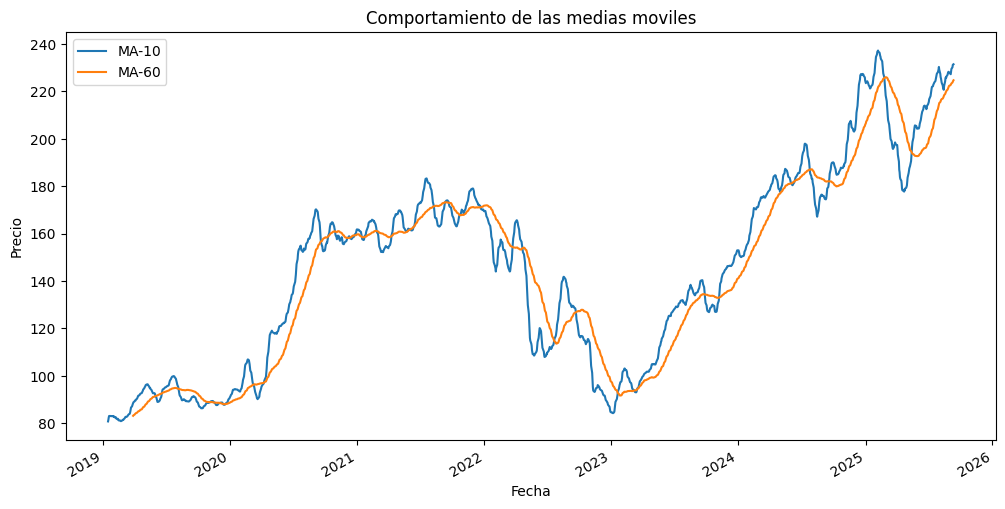

In [59]:
#gráfica de la acción
accion[['MA-10','MA-60']].plot(figsize=(12,6))
plt.title("Comportamiento de las medias moviles")
plt.xlabel("Fecha")
plt.ylabel("Precio")

plt.show()

In [60]:
accion

,precio_cierre,MA-10,MA-60,invertir,Señal,rendimiento
Date,,,,,,
2019-01-02,76.956497,NaN,NaN,False,-1,NaN
2019-01-03,75.014000,NaN,NaN,False,-1,-0.025241
2019-01-04,78.769501,NaN,NaN,False,-1,0.050064
2019-01-07,81.475502,NaN,NaN,False,-1,0.034353
2019-01-08,82.829002,NaN,NaN,False,-1,0.016612
...,...,...,...,...,...,...
2025-09-05,232.330002,229.455000,223.344167,True,1,-0.014214
2025-09-08,235.839996,230.155000,223.721501,True,1,0.015108
2025-09-09,238.240005,231.185001,224.138167,True,1,0.010176


> Cuando en la columna "Señal" sea "1" va a ser indicativo que podemos comprar la acción, pero debemos apoyarnos de la gráfica "Comportamiento de las medias moviles" porque puede ser un falso positivo, necesitamos ver la tendencia, que MA-10 no este a punto de tocar a la baja la MA-60


Parte del **analisis técnico** para hacer una inversión, podemos revisar el rendimiento historico de la acción entre las fechas seleccionadas

In [61]:
#rendimiento total del periodo
print("El rendimiento de la acción es de",((accion['rendimiento'].sum())*100).round(2),"%")

El rendimiento de la acción es de 148.73 %


In [62]:
#rendimiento del periodo
print("El rendimiento de la acción es de",
 (((accion.iloc[-1,0])-(accion.iloc[0,0]))/(accion.iloc[0,0])*100).round(2),"%")

El rendimiento de la acción es de 198.81 %


Para el caso de amazon, tiene un rendimiento de **198%**, si hubiera invertido 100 mil pesos en el 2019 en amazon al dia de hoy tendria un redminieto de 198 mil pesos


# Conclusión
Concluimos que el dia de hoy **si es buena opción invertir**, la acción tiene buenos rendimientos historicos y esta por encima del promedio movil de los ultimos 60 dias, para hacer un análisis más certero pudieramos apoyarnos en ver los estados de resultados de la empresa para saber que es solida financieramente, aparte de apoyarnos de noticias del dia que la involucren o informarnos sobre proyectos a futuro de la empresa.

## Adicional
Adicional pudieramos apoyarnos de las bandas de bollinger, una medida que a mi en lo personal me gusta, aqui se utilizas las desviaciones estandar del precio de las acciones para ver si hay una sobreventa de la acción o una sobrecompra,


*   existe un limite superior que es el "upper", es el precio de la acción más dos veces su desviación estandar de los ultimos 20 dias  
*   existe un limite inferior que es el "lower"  el precio de la acción menos dos veces su desviación estandar en los ultimos 20 dias.




> *En una distribución normal, alrededor del 68% de los datos se concentran a una desviación estándar de la media, cerca del 95% dentro de dos desviaciones y casi el 100% (99.7%) dentro de tres. Al usar 2 desviaciones estándar, las bandas abarcan aproximadamente el 95% de los precios esperados en condiciones normales.*




*   Si el precio de la acción toca la banda superior, el precio esta más alto de lo normal, usualmente cuando toca esa banda los dias siguientes el precio tiende a bajar pero no es una regla de que siempre pase eso.
*   Si el precio de la acción toca la banda inferior, el precio esta más bajo de lo normal, usualmente cuando toca esa banda los dias siguientes el precio tiende a subir pero no es una regla de que siempre pase eso.

Lo que se traduce a si toca la banda superior puedo vender a precio alto, si toca la banda inferior compro, esta estrategia es mas para un perfil de riesgo más agresivo.



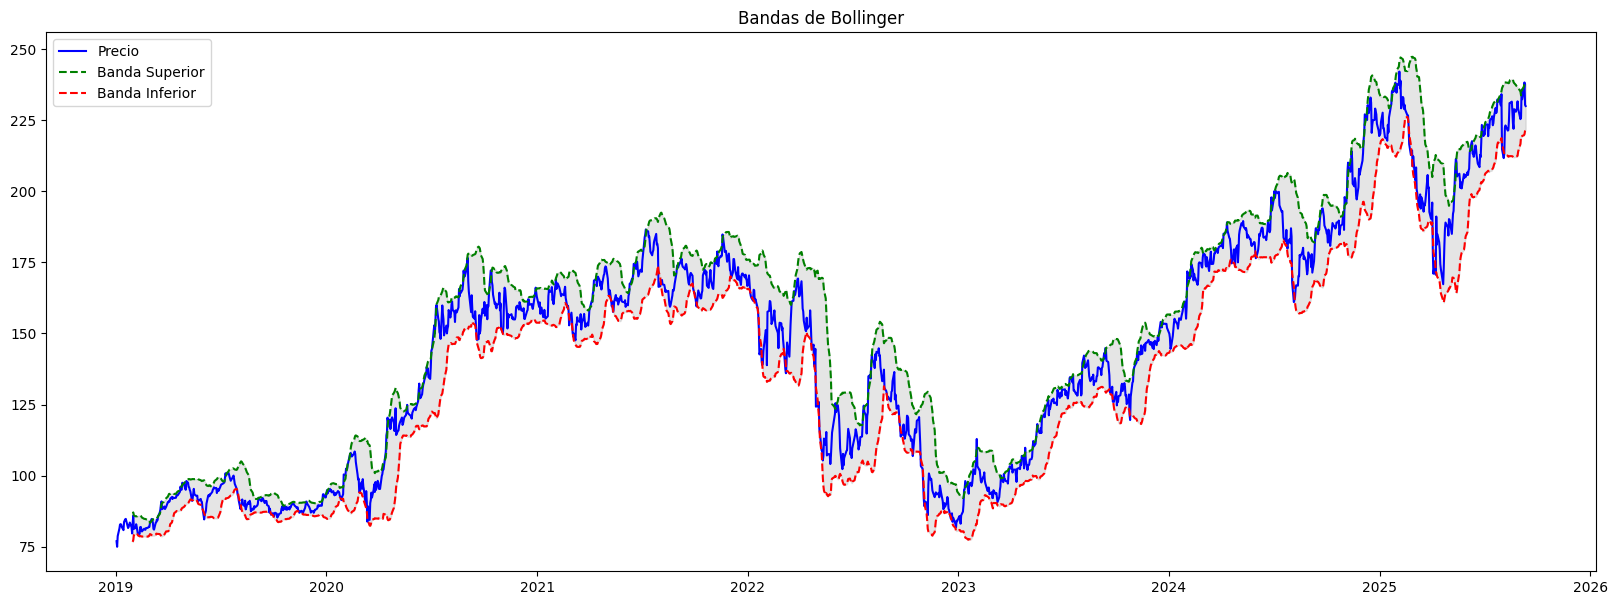

In [64]:
accion["SMA20"] = accion["precio_cierre"].rolling(window=20).mean()
accion["STD20"] = accion["precio_cierre"].rolling(window=20).std()

accion["Upper"] = accion["SMA20"] + (2 * accion["STD20"])
accion["Lower"] = accion["SMA20"] - (2 * accion["STD20"])

# Gráfico
plt.figure(figsize=(20,7))
plt.plot(accion["precio_cierre"], label="Precio", color="blue")
#plt.plot(accion["SMA20"], label="SMA 20", color="orange")
plt.plot(accion["Upper"], label="Banda Superior", color="green", linestyle="--")
plt.plot(accion["Lower"], label="Banda Inferior", color="red", linestyle="--")
plt.fill_between(accion.index, accion["Lower"], accion["Upper"], color="gray", alpha=0.2)
plt.title("Bandas de Bollinger")
plt.legend()
plt.show()